In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_log_error
import streamlit as st
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import optimizers

2024-01-30 21:30:56.517756: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
database = '/Users/mamon/Documents/GitHub/65130468_BD528-Y2023_Final_Project-/data/Candy_data_22_23.csv'
sales_data =pd.read_csv(database)

In [3]:
sales_data = sales_data.loc[sales_data['Sales'] > 0]
sales_data['date'] = pd.to_datetime(sales_data["date"])

sales_data

,date,Province_Route_Customer,PPG_flavor,Sales
0,2022-01-01,Chachoengsao/ASCV01/CT0000439,Halls Pillow_L100/Fresh Lime,0.138889
1,2022-03-26,Chachoengsao/ASCV01/CT0000439,Halls Stick_9s/Honey Lemon,0.333333
2,2022-01-01,Chachoengsao/ASCV01/CT0001155,Halls Stick_9s/Honey Lemon,0.083333
3,2022-01-01,Chachoengsao/ASCV01/CT0001155,Halls Stick_9s/Mentholyptus,0.083333
4,2022-01-01,Pathum Thani/ASCP02/CT0002629,Halls Pillow_L100/Fresh Lime,0.027778
...,...,...,...,...
1466168,2023-11-30,Bangkok/ASCP16/CT0254948,Halls Pillow_L100/Mentholyptus,0.055556
1466169,2023-11-30,Bangkok/ASCP16/CT0254949,Halls Pillow_L100/Mentholyptus,0.083333
1466170,2023-11-30,Bangkok/ASCP16/CT0254950,Halls Pillow_L100/Honey Lemon,0.027778
1466171,2023-11-30,Bangkok/ASCP16/CT0254950,Halls Pillow_L100/Mentholyptus,0.055556


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1466173 entries, 0 to 1466172
Data columns (total 4 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   date                     1466173 non-null  datetime64[ns]
 1   Province_Route_Customer  1466173 non-null  object        
 2   PPG_flavor               1466173 non-null  object        
 3   Sales                    1466173 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 55.9+ MB


In [5]:
sales_data['year'] = sales_data['date'].dt.year
sales_data['month'] = sales_data['date'].dt.month
sales_data['day'] = sales_data['date'].dt.day
sales_data['day_of_week'] = sales_data['date'].dt.day_of_week
sales_data.head()

,date,Province_Route_Customer,PPG_flavor,Sales,year,month,day,day_of_week
0,2022-01-01,Chachoengsao/ASCV01/CT0000439,Halls Pillow_L100/Fresh Lime,0.138889,2022,1,1,5
1,2022-03-26,Chachoengsao/ASCV01/CT0000439,Halls Stick_9s/Honey Lemon,0.333333,2022,3,26,5
2,2022-01-01,Chachoengsao/ASCV01/CT0001155,Halls Stick_9s/Honey Lemon,0.083333,2022,1,1,5
3,2022-01-01,Chachoengsao/ASCV01/CT0001155,Halls Stick_9s/Mentholyptus,0.083333,2022,1,1,5
4,2022-01-01,Pathum Thani/ASCP02/CT0002629,Halls Pillow_L100/Fresh Lime,0.027778,2022,1,1,5


In [6]:
sales_data.drop(['date'], axis=1, inplace=True)
sales_data.sort_values(by=['year','month','day'],ignore_index=True)

,Province_Route_Customer,PPG_flavor,Sales,year,month,day,day_of_week
0,Chachoengsao/ASCV01/CT0000439,Halls Pillow_L100/Fresh Lime,0.138889,2022,1,1,5
1,Chachoengsao/ASCV01/CT0001155,Halls Stick_9s/Honey Lemon,0.083333,2022,1,1,5
2,Chachoengsao/ASCV01/CT0001155,Halls Stick_9s/Mentholyptus,0.083333,2022,1,1,5
3,Pathum Thani/ASCP02/CT0002629,Halls Pillow_L100/Fresh Lime,0.027778,2022,1,1,5
4,Pathum Thani/ASCP02/CT0003340,Halls Stick_9s/Mentholyptus,0.166667,2022,1,1,5
...,...,...,...,...,...,...,...
1466168,Bangkok/ASCP16/CT0254948,Halls Pillow_L100/Mentholyptus,0.055556,2023,11,30,3
1466169,Bangkok/ASCP16/CT0254949,Halls Pillow_L100/Mentholyptus,0.083333,2023,11,30,3
1466170,Bangkok/ASCP16/CT0254950,Halls Pillow_L100/Honey Lemon,0.027778,2023,11,30,3
1466171,Bangkok/ASCP16/CT0254950,Halls Pillow_L100/Mentholyptus,0.055556,2023,11,30,3


In [7]:
sales_data.drop(['Province_Route_Customer'], axis=1, inplace=True)
sales_data.drop(['PPG_flavor'], axis=1, inplace=True)



In [8]:
sales_df = sales_data.groupby(["year", "month", "day","day_of_week"],as_index=False)["Sales"].sum()

In [9]:
sales_df

,year,month,day,day_of_week,Sales
0,2022,1,1,5,66.358333
1,2022,1,2,6,83.037486
2,2022,1,3,0,97.215276
3,2022,1,4,1,68.249993
4,2022,1,5,2,76.679159
...,...,...,...,...,...
684,2023,11,26,6,90.826456
685,2023,11,27,0,151.320189
686,2023,11,28,1,153.858672
687,2023,11,29,2,205.587123


In [10]:
ma14 = sales_df.Sales.rolling(14).mean()
ma7 =sales_df.Sales.rolling(7).mean()

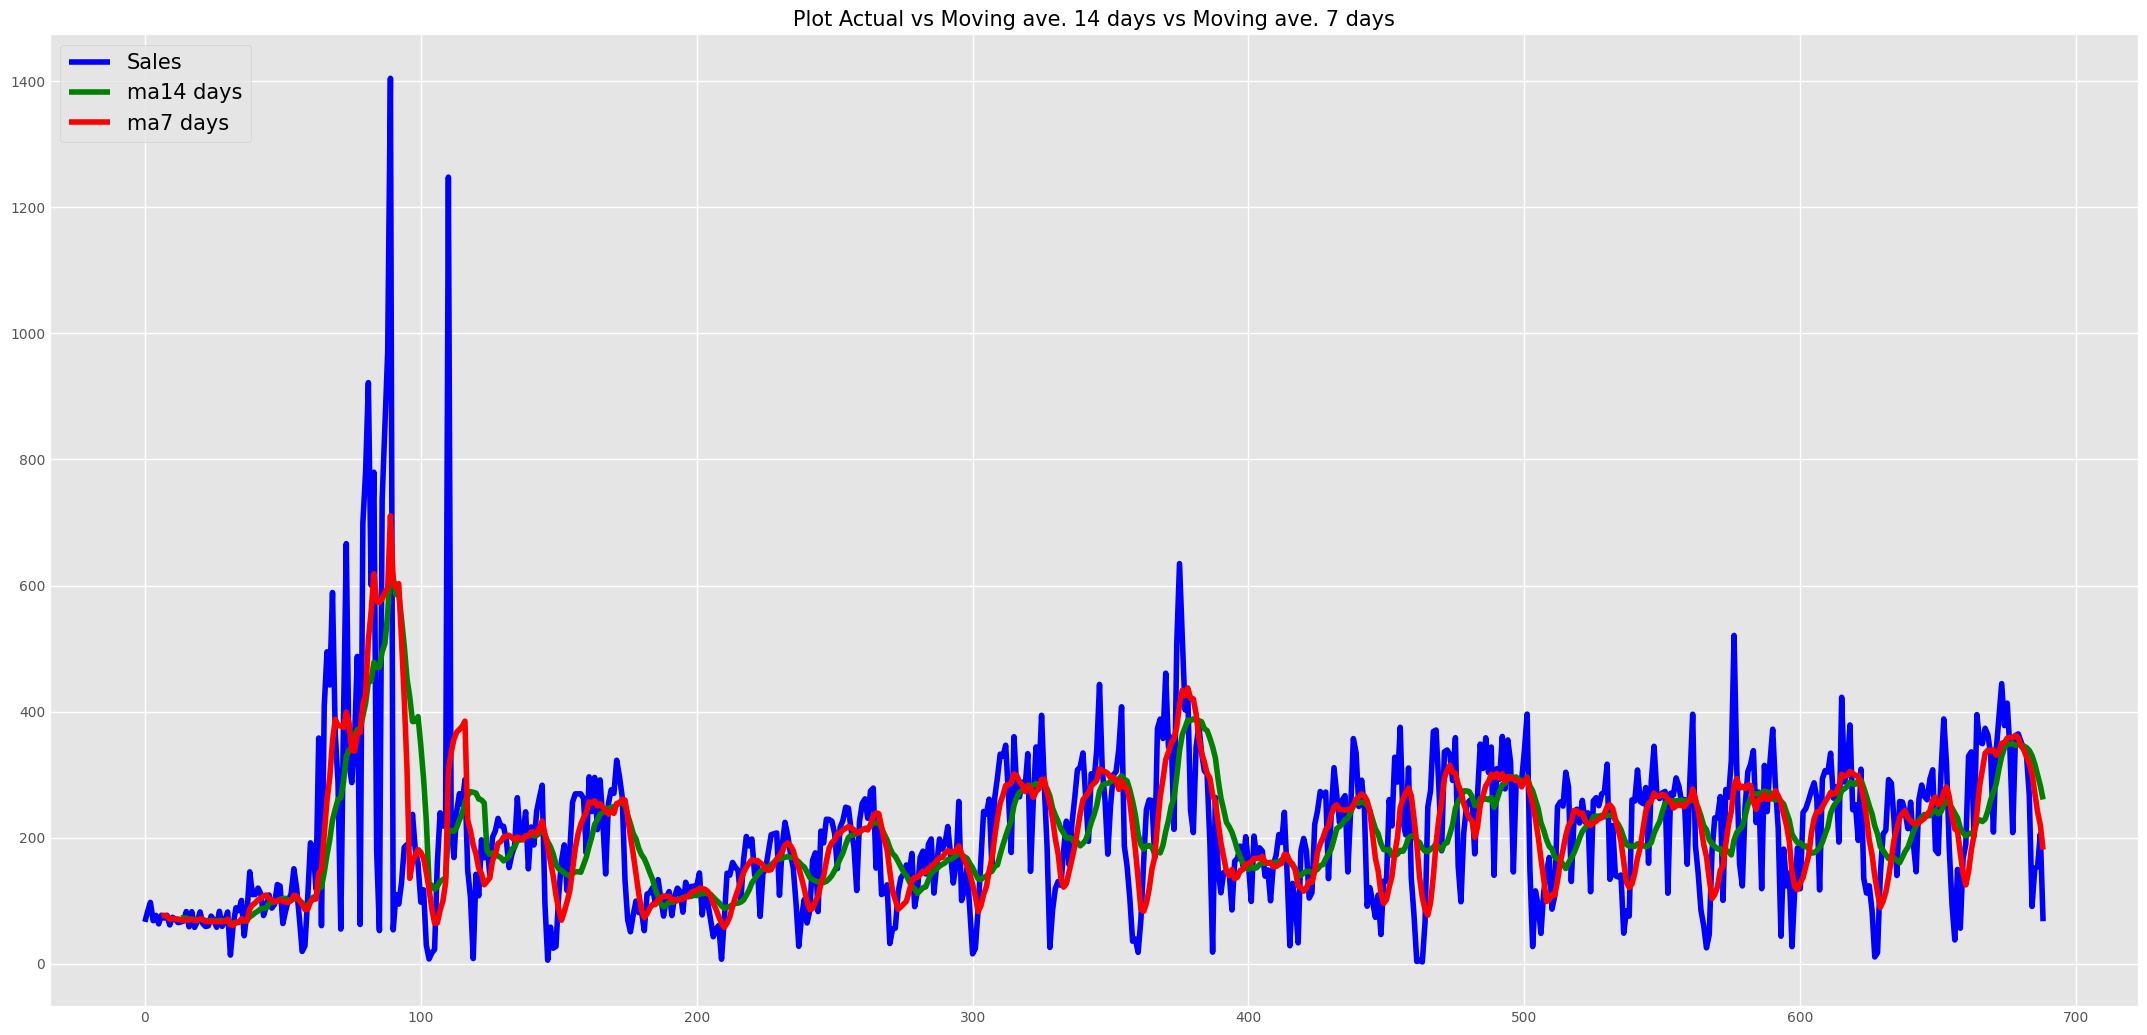

In [58]:
#plt.style.use('fivethirtyeight')
plt.figure(figsize=(24,12))
plt.plot(sales_df.Sales,'b',label='Sales')
plt.plot(ma14,'g',label="ma14 days")
plt.plot(ma7,'r',label='ma7 days')
plt.legend(fontsize=15,loc='upper left')
plt.title('Plot Actual vs Moving ave. 14 days vs Moving ave. 7 days',fontsize=15,loc='center')
plt.show()

In [12]:
#splitting Data into training and testing
data_training = pd.DataFrame(sales_df['Sales'][0:int(len(sales_df)*0.7)])
data_testing = pd.DataFrame(sales_df['Sales'][int(len(sales_df)*0.7):int(len(sales_df))])
print(data_training.shape)
print(data_testing.shape)

(482, 1)
(207, 1)


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[4.53628787e-02],
       [5.72605510e-02],
       [6.73739363e-02],
       [4.67122486e-02],
       [5.27249912e-02],
       [4.30475403e-02],
       [5.28666662e-02],
       [4.96953192e-02],
       [5.27893943e-02],
       [4.18873962e-02],
       [5.05305288e-02],
       [4.84381060e-02],
       [4.45177768e-02],
       [4.51884624e-02],
       [4.62723692e-02],
       [5.70435884e-02],
       [3.98494373e-02],
       [5.69009207e-02],
       [3.91173138e-02],
       [4.55065333e-02],
       [5.66165830e-02],
       [4.31456239e-02],
       [4.01308298e-02],
       [4.08629784e-02],
       [5.18907929e-02],
       [4.72462276e-02],
       [3.92183683e-02],
       [5.72873006e-02],
       [4.02615976e-02],
       [4.67637716e-02],
       [5.65640774e-02],
       [7.78737260e-03],
       [4.20994125e-02],
       [6.13165406e-02],
       [5.80957467e-02],
       [6.96446905e-02],
       [2.96756524e-02],
       [5.58160728e-02],
       [1.01978166e-01],
       [7.62013422e-02],


In [15]:
data_training_array.shape

(482, 1)

In [16]:
x_train = []
y_train = []
long = 14
for i in range (long,data_training_array.shape[0]):
    x_train.append(data_training_array[i-long:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [17]:
print(x_train.shape)
print(y_train.shape)

(468, 14, 1)
(468,)


In [18]:
#ML model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units=500, activation= 'relu', return_sequences= True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=700, activation= 'relu', return_sequences= True))
model.add(Dropout(0.3))
model.add(LSTM(units=900, activation= 'relu', return_sequences= True))
model.add(Dropout(0.4))
model.add(LSTM(units=1100, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 500)           1004000   
                                                                 
 dropout (Dropout)           (None, 14, 500)           0         
                                                                 
 lstm_1 (LSTM)               (None, 14, 700)           3362800   
                                                                 
 dropout_1 (Dropout)         (None, 14, 700)           0         
                                                                 
 lstm_2 (LSTM)               (None, 14, 900)           5763600   
                                                                 
 dropout_2 (Dropout)         (None, 14, 900)           0         
                                                                 
 lstm_3 (LSTM)               (None, 1100)              8

In [ ]:
#from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#filepath = '{epoch:02d}-{loss:.4f}-{val_loss:.4f}-{mae:.4f}-{val_mae:.4f}.h5'

#callbacks = [EarlyStopping(monitor='val_loss', patience=20),
#             ModelCheckpoint(filepath, monitor='loss', save_best_only=True, mode='min')]

In [ ]:
#model.compile(optimizer='SGD',loss='mse',metrics=['mae'])
#optimizers.SGD(momentum=0.9)
#model.fit(x_train,y_train, validation_split=0.2,epochs=200,callbacks=callbacks, batch_size=16)

In [21]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=200)

Epoch 1/200
15/15 [==============================] - 13s 593ms/step - loss: 0.0229
Epoch 2/200
15/15 [==============================] - 9s 596ms/step - loss: 0.0127
Epoch 3/200
15/15 [==============================] - 9s 620ms/step - loss: 0.0123
Epoch 4/200
15/15 [==============================] - 10s 689ms/step - loss: 0.0122
Epoch 5/200
15/15 [==============================] - 9s 604ms/step - loss: 0.0116
Epoch 6/200
15/15 [==============================] - 9s 600ms/step - loss: 0.0110
Epoch 7/200
15/15 [==============================] - 9s 598ms/step - loss: 0.0111
Epoch 8/200
15/15 [==============================] - 10s 668ms/step - loss: 0.0107
Epoch 9/200
15/15 [==============================] - 11s 762ms/step - loss: 0.0108
Epoch 10/200
15/15 [==============================] - 9s 624ms/step - loss: 0.0113
Epoch 11/200
15/15 [==============================] - 10s 680ms/step - loss: 0.0112
Epoch 12/200
15/15 [==============================] - 10s 652ms/step - loss: 0.0114
Epoch 1

In [22]:
model.save('LSTM_model.pkl')

INFO:tensorflow:Assets written to: LSTM_model.pkl/assets


INFO:tensorflow:Assets written to: LSTM_model.pkl/assets


In [ ]:
#model=load_model('keras_model2.h5')

In [23]:
MSE = model.evaluate(x_train, y_train)
print(MSE)

15/15 [==============================] - 3s 144ms/step - loss: 0.0034
0.0034108867403119802


In [24]:
data_testing.head()

,Sales
482,174.250254
483,266.041013
484,348.414073
485,309.732261
486,358.412522


In [25]:
past_100_days = data_training.tail(len(sales_df)-1)
past_100_days

,Sales
0,66.358333
1,83.037486
2,97.215276
3,68.249993
4,76.679159
...,...
477,98.252621
478,206.714868
479,249.994554
480,258.093213


In [26]:
final_df = past_100_days._append(data_testing,ignore_index=True)

In [27]:
final_df.head(),final_df.tail()

(       Sales
 0  66.358333
 1  83.037486
 2  97.215276
 3  68.249993
 4  76.679159,
           Sales
 684   90.826456
 685  151.320189
 686  153.858672
 687  205.587123
 688   67.389752)

In [28]:
sales_df.head(),sales_df.tail()

(   year  month  day  day_of_week      Sales
 0  2022      1    1            5  66.358333
 1  2022      1    2            6  83.037486
 2  2022      1    3            0  97.215276
 3  2022      1    4            1  68.249993
 4  2022      1    5            2  76.679159,
      year  month  day  day_of_week       Sales
 684  2023     11   26            6   90.826456
 685  2023     11   27            0  151.320189
 686  2023     11   28            1  153.858672
 687  2023     11   29            2  205.587123
 688  2023     11   30            3   67.389752)

In [29]:
input_data = scaler.fit_transform(final_df)
input_data

array([[4.53628787e-02],
       [5.72605510e-02],
       [6.73739363e-02],
       [4.67122486e-02],
       [5.27249912e-02],
       [4.30475403e-02],
       [5.28666662e-02],
       [4.96953192e-02],
       [5.27893943e-02],
       [4.18873962e-02],
       [5.05305288e-02],
       [4.84381060e-02],
       [4.45177768e-02],
       [4.51884624e-02],
       [4.62723692e-02],
       [5.70435884e-02],
       [3.98494373e-02],
       [5.69009207e-02],
       [3.91173138e-02],
       [4.55065333e-02],
       [5.66165830e-02],
       [4.31456239e-02],
       [4.01308298e-02],
       [4.08629784e-02],
       [5.18907929e-02],
       [4.72462276e-02],
       [3.92183683e-02],
       [5.72873006e-02],
       [4.02615976e-02],
       [4.67637716e-02],
       [5.65640774e-02],
       [7.78737260e-03],
       [4.20994125e-02],
       [6.13165406e-02],
       [5.80957467e-02],
       [6.96446905e-02],
       [2.96756524e-02],
       [5.58160728e-02],
       [1.01978166e-01],
       [7.62013422e-02],


In [30]:
input_data.shape

(689, 1)

In [31]:
x_test = []
y_test = []

for i in range(long, input_data.shape[0]):
    x_test.append(input_data[i-long:i])
    y_test.append(input_data[i,0])

In [32]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(675, 14, 1)
(675,)


In [33]:
#Making Prediction
y_prediction = model.predict(x_test)

22/22 [==============================] - 4s 143ms/step


In [34]:
y_prediction.shape

(675, 1)

In [35]:
scaler.scale_

array([0.00071333])

In [36]:
scale_factor = 1/scaler.scale_[0]
y_prediction = y_prediction*scale_factor
y_train = y_train*scale_factor
y_test = y_test*scale_factor

In [37]:
y_train.shape

(468,)

In [38]:
y_test.shape

(675,)

In [39]:
y_test_frame = pd.DataFrame(y_test)
y_test_frame = y_test_frame.set_axis(['Sales'], axis=1)
y_test_frame.head(),y_test_frame.tail()

(       Sales
 0  64.868480
 1  79.968476
 2  55.864276
 3  79.768473
 4  54.837924,
           Sales
 670   88.061602
 671  148.555335
 672  151.093819
 673  202.822270
 674   64.624898)

In [40]:
y_prediction.shape

(675, 1)

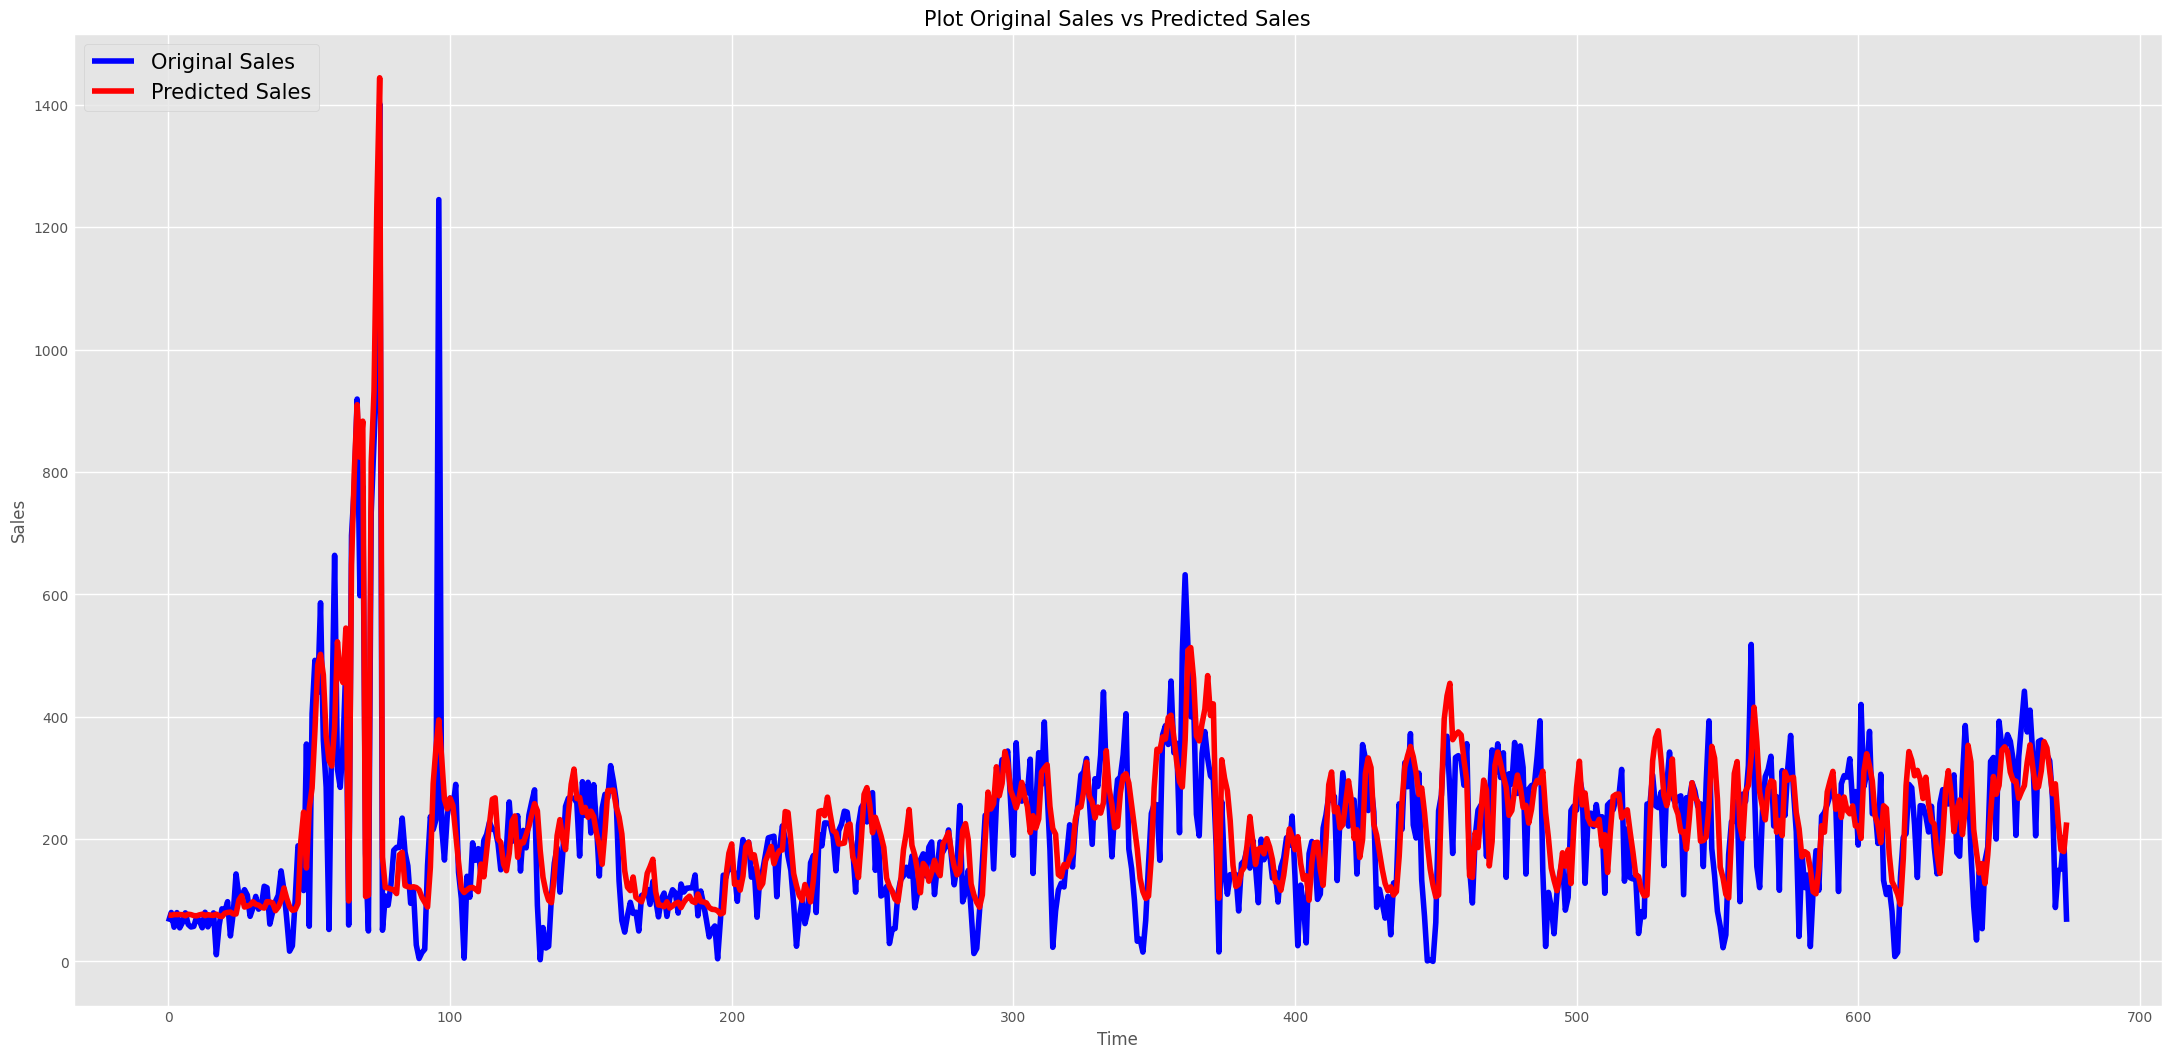

In [60]:
plt.style.use('ggplot')
plt.figure(figsize=(24,12))
#plt.plot(sales_df.Sales,'gray',label='Sales')
plt.plot(y_test,'b',label = 'Original Sales')
plt.plot(y_prediction,'r',label = 'Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend(fontsize=15,loc='upper left')
plt.title('Plot Original Sales vs Predicted Sales',fontsize=15,loc='center')
plt.show()

In [42]:
period_predict = 90
start_idx = input_data.shape[0] - period_predict
x_test2 = []
y_test2 = []

for i in range(long, input_data.shape[0]):
    x_test2.append(input_data[i-long:i])
    y_test2.append(input_data[i,0])

In [43]:
x_test2, y_test2 = np.array(x_test2), np.array(y_test2)
print(x_test2.shape)
print(y_test2.shape)

(675, 14, 1)
(675,)


In [44]:
# Make predictions with our LSTM model
model_preds = model.predict(x_test2)
future_preds = model_preds[-period_predict:]

22/22 [==============================] - 4s 155ms/step


In [45]:
future_preds.shape

(90, 1)

In [46]:
y_test2 = y_test2*scale_factor
model_preds = model_preds*scale_factor
future_preds = future_preds*scale_factor

In [47]:
y_test2

array([6.48684799e+01, 7.99684763e+01, 5.58642762e+01, 7.97684728e+01,
       5.48379243e+01, 6.37948670e+01, 7.93698645e+01, 6.04851465e+01,
       5.62587559e+01, 5.72851430e+01, 7.27448564e+01, 6.62337160e+01,
       5.49795910e+01, 8.03101324e+01, 5.64420771e+01, 6.55573687e+01,
       7.92962576e+01, 1.09169907e+01, 5.90184798e+01, 8.59586584e+01,
       8.14434799e+01, 9.76337559e+01, 4.16018132e+01, 7.82476423e+01,
       1.42961528e+02, 1.06825419e+02, 1.07035084e+02, 1.17224027e+02,
       1.08387921e+02, 7.36476071e+01, 8.75594480e+01, 1.06236534e+02,
       8.53393054e+01, 9.14628856e+01, 1.22829563e+02, 1.20468474e+02,
       6.08837534e+01, 8.07879243e+01, 9.80406936e+01, 1.08158753e+02,
       1.47928120e+02, 1.16933717e+02, 6.91434270e+01, 1.67101465e+01,
       2.53920575e+01, 1.00567012e+02, 1.88958756e+02, 1.82004542e+02,
       1.15785147e+02, 3.55265702e+02, 5.75351466e+01, 4.04716987e+02,
       4.92053170e+02, 4.39462227e+02, 5.86099035e+02, 3.61401813e+02,
      

In [48]:
future_preds

array([[110.45807],
       [150.48305],
       [221.8298 ],
       [211.16045],
       [276.97076],
       [294.93213],
       [310.57913],
       [248.68745],
       [269.61832],
       [235.24121],
       [268.61386],
       [246.80322],
       [241.2629 ],
       [254.18292],
       [221.36003],
       [221.63097],
       [201.11713],
       [310.0178 ],
       [339.46255],
       [319.55905],
       [294.95184],
       [237.71599],
       [222.84229],
       [194.16116],
       [254.4259 ],
       [250.15532],
       [175.48262],
       [130.49619],
       [120.98295],
       [109.63188],
       [ 93.02057],
       [167.98038],
       [287.5999 ],
       [342.96585],
       [328.8812 ],
       [303.38208],
       [312.28937],
       [298.10526],
       [266.2417 ],
       [301.01633],
       [257.27975],
       [229.80519],
       [224.16257],
       [174.24008],
       [143.95792],
       [202.2356 ],
       [278.79828],
       [311.66446],
       [275.0926 ],
       [212.07602],


In [49]:
final_forecast = np.append(model_preds,future_preds)

In [50]:
final_forecast

array([  75.91634 ,   75.38686 ,   76.459564,   76.41677 ,   76.653595,
         76.3491  ,   74.58906 ,   77.079094,   76.47008 ,   74.866516,
         74.5255  ,   76.07828 ,   77.11914 ,   74.824165,   76.38003 ,
         75.57918 ,   75.09881 ,   77.18307 ,   74.235   ,   73.16711 ,
         78.71753 ,   79.99287 ,   80.60194 ,   77.626526,   77.47961 ,
        100.17038 ,  107.343765,   88.80945 ,   90.23195 ,   92.27028 ,
         97.59373 ,   93.07146 ,   92.10443 ,   88.37973 ,   87.173225,
         97.64079 ,   97.17752 ,   95.586655,   82.89445 ,   88.76366 ,
         99.622314,  120.045616,  103.1047  ,   89.50268 ,   83.56764 ,
         84.55658 ,   94.565384,  196.44147 ,  243.99347 ,  152.63286 ,
        250.17218 ,  283.43958 ,  376.09406 ,  484.13562 ,  501.96274 ,
        468.16052 ,  368.56433 ,  328.57837 ,  319.28906 ,  382.5649  ,
        522.45593 ,  466.5741  ,  455.69357 ,  544.79474 ,   98.80773 ,
        648.36615 ,  800.9854  ,  909.9211  ,  823.8625  ,  882.

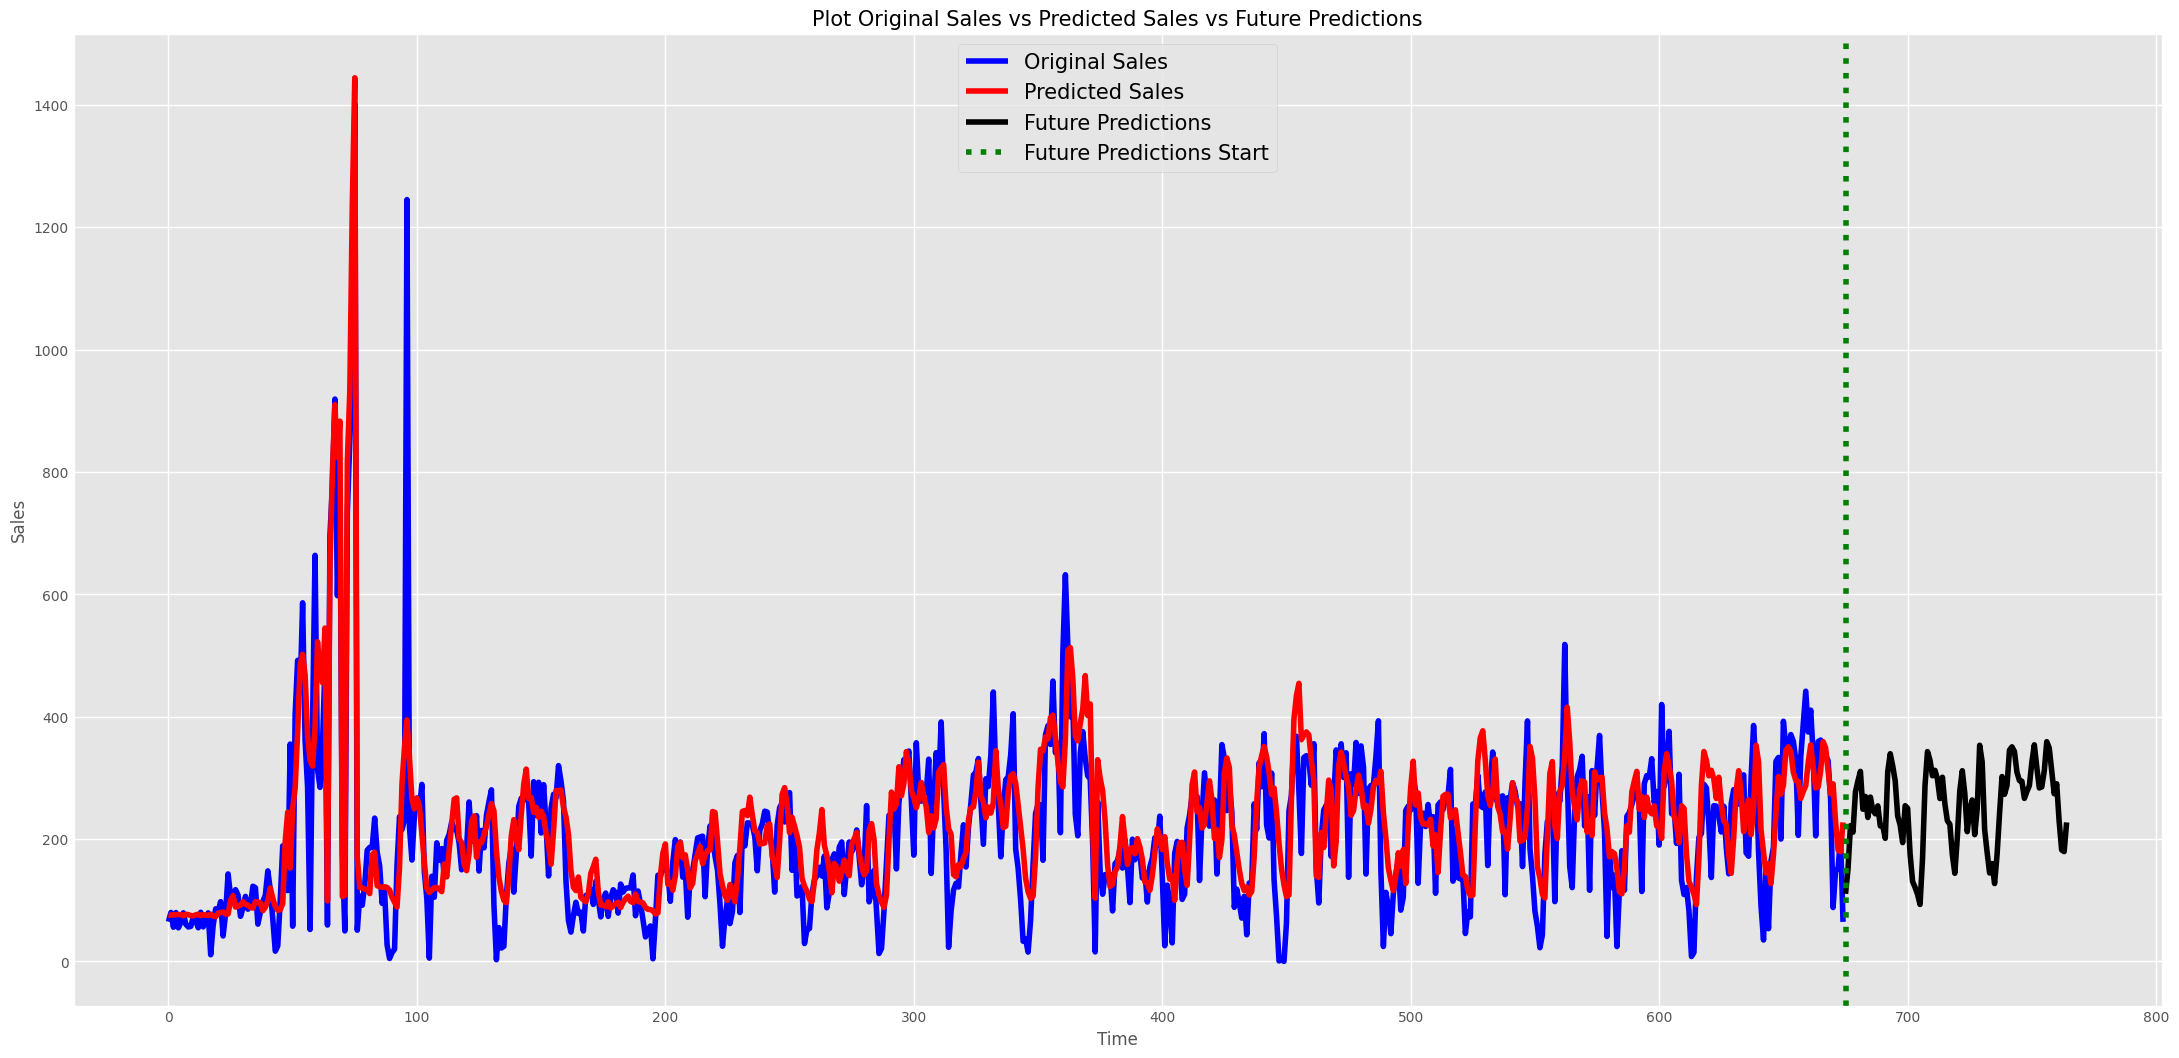

In [62]:
plt.style.use('ggplot')
plt.figure(figsize=(24, 12))
plt.plot(y_test2,'blue',label = 'Original Sales')

# Combine y_test2 and future_preds for a continuous plot
combined_data = model_preds.tolist() + future_preds.tolist()
# Generate correct x-axis values for continuous plotting
x_values = range(len(combined_data))
# Plot the combined data in blue
plt.plot(x_values[:len(y_test2)],combined_data[:len(y_test2)], color='red', label='Predicted Sales')

# Plot final_forecast in red
plt.plot(x_values[len(y_test2):],combined_data[len(y_test2):], color='black', label='Future Predictions')

# Indicate the start of future_preds with a vertical line
plt.axvline(x=len(y_test2), color='green', linestyle='dotted', label='Future Predictions Start')

plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend(fontsize=15,loc='upper center')
plt.title('Plot Original Sales vs Predicted Sales vs Future Predictions',fontsize=15,loc='center')
plt.show()


In [53]:
future_preds_data = pd.DataFrame(future_preds)
future_preds_data = future_preds_data.set_axis(['Predicted Sales'], axis=1)
future_preds_data

,Predicted Sales
0,110.458069
1,150.483047
2,221.829803
3,211.160446
4,276.970764
...,...
85,290.287750
86,228.286850
87,182.116852
88,179.480209
